# Intro to R Part 19: Base R Plotting
[back to index](https://www.kaggle.com/hamelg/intro-to-r-index)

In the [last lesson](), we learned that generating frequency tables is a simple way to start exploring the distribution of categorical data, but they don't work well with numeric data since numeric data tends to take on many unique values. Data visualizations are one of the most powerful tools at your disposal for exploring data and communicating data insights, particularly when dealing with numeric values. R has a simple, yet powerful set of built in graphics functions that let you create plots with minimal code. The plots produced by R's base graphics functions might not win any awards for aesthetics, but they are useful for quick and dirty exploratory analysis.

Before we begin, we will load the ggplot2 package for R. ggplot2 is a graphics package that provides powerful plotting capabilities beyond R's base plotting functions. We won't actually get into ggplot2 itself quite yet (we'll do that in the next lesson), but the package comes with a diamonds data set that we'll use throughout our lessons on plotting.

In [1]:
library(ggplot2)
str(diamonds)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


The output shows that data set contains 10 features of 53940 different diamonds, including both numeric and ordered categorical variables. We'll start by reviewing a couple plotting functions we've already seen: hist() and boxplot().

# Histograms

A histogram is a univariate plot (a plot that displays one variable) that groups a numeric variable into bins and displays the number of observations that fall within each bin. A histogram is a useful tool for getting a sense of the distribution of a numeric variable. Let's create a histogram of diamond carat weight with the hist() function.

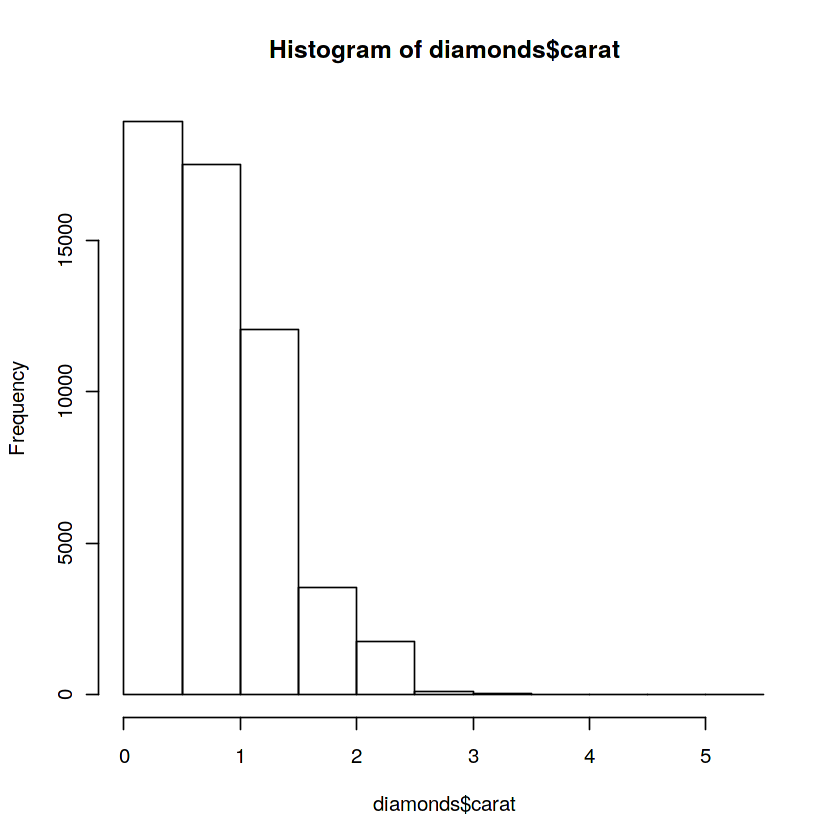

In [2]:
hist(diamonds$carat)


*Note: When you create a plot in a local RStudio environment, it will appear in the bottom right pane under the "plots" tab. Use the left and right arrows to cycle through the plots you've created.*

We see immediately that the carat weights are positively skewed: most diamonds are around 1 carat or below but there are extreme cases of larger diamonds.

The plot above has fairly wide bins and there doesn't appear to be any data beyond a carat size of 3.5. We can make try to get more out of hour histogram by adding some additional arguments to control the size of the bins and limits of the x-axis.

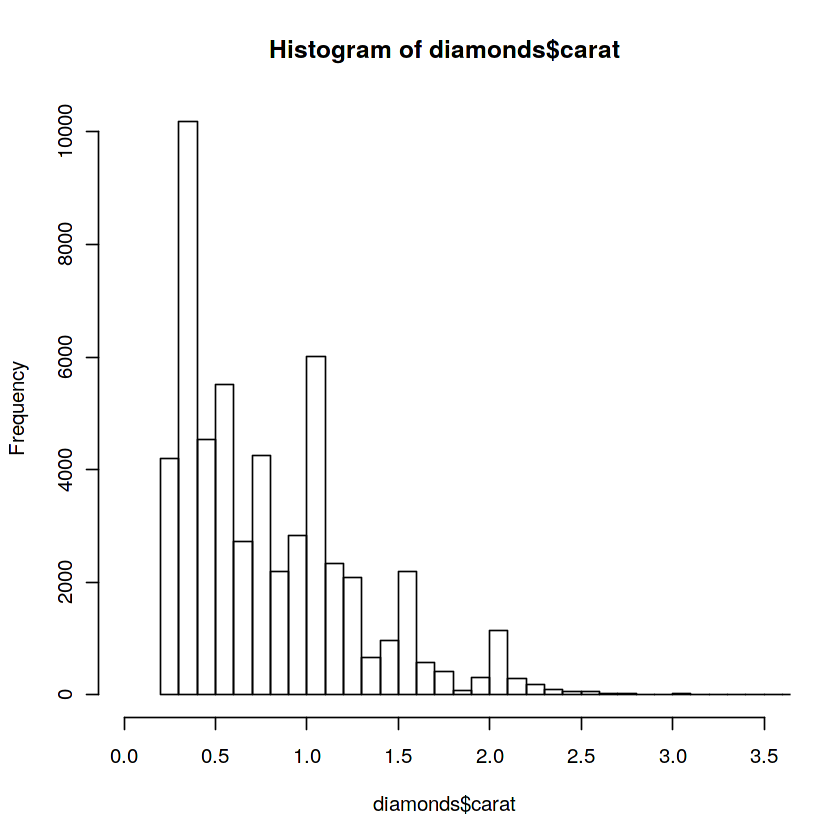

In [3]:
hist(diamonds$carat,
     breaks = 50,       # Group into 50 bins
     xlim = c(0,3.5))   # Limit the X-axis to the range 0-3.5

This histogram gives us a better sense of some subtleties within the distribution, but we can't be sure that it contains all the data. Limiting the X-axis to 3.5 might have cut out some outliers with counts so small that they didn't show up as bars on our original chart. Let's check to see if any diamonds are larger than 3.5 carats.

In [4]:
subset(diamonds, carat > 3.5)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3.65,Fair,H,I1,67.1,53,11668,9.53,9.48,6.38
4.01,Premium,I,I1,61.0,61,15223,10.14,10.10,6.17
4.01,Premium,J,I1,62.5,62,15223,10.02,9.94,6.24
4.00,Very Good,I,I1,63.3,58,15984,10.01,9.94,6.31
3.67,Premium,I,I1,62.4,56,16193,9.86,9.81,6.13
4.13,Fair,H,I1,64.8,61,17329,10.00,9.85,6.43
5.01,Fair,J,I1,65.5,59,18018,10.74,10.54,6.98
4.50,Fair,J,I1,65.8,58,18531,10.23,10.16,6.72
3.51,Premium,J,VS2,62.5,59,18701,9.66,9.63,6.03


It turns out that 9 diamonds are bigger than 3.5 carats. Should cutting these diamonds out concern us? On one hand, these outliers have very little bearing on the shape of the distribution. On the other hand, limiting the X-axis to 3.5 implies that no data lies beyond that point. For our own exploratory purposes this is not an issue but if we were to show this plot to someone else, it could be misleading. Including a note that 9 diamonds lie beyond the chart range could be helpful.

# Boxplots

Boxplots are another type of univariate plot for summarizing distributions of numeric data graphically. Let's make a boxplot of carat.

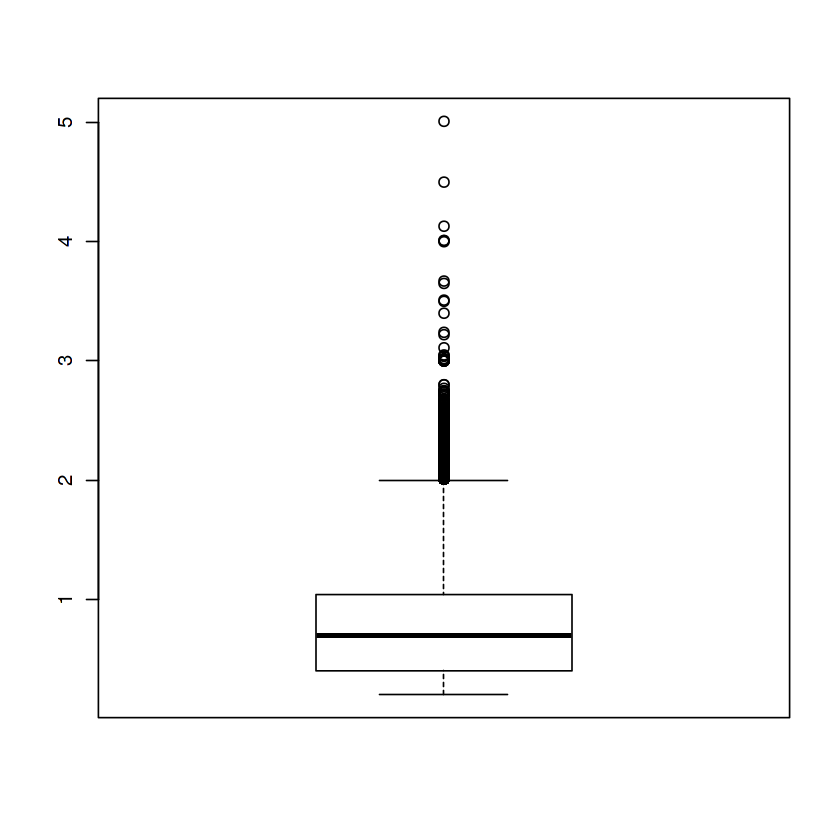

In [5]:
boxplot(diamonds$carat)

As we learned in lesson 13, the central box of the boxplot represents the middle 50% of the observations, the central bar is the median and the bars at the end of the dotted lines (whiskers) encapsulate the great majority of the observations. Circles that lie beyond the end of the whiskers are data points that may be outliers. 

In this case, our data set has over 50,000 observations and we see many data points beyond the top whisker. We probably wouldn't want to classify all of those points as outliers, but the handful of diamonds at 4 carats and above are definitely far outside the norm. 

One of the most useful features of the boxplot() function is the ability to make side-by-side boxplots. A side-by-side boxplot takes a numeric variable and splits it on based on some categorical variable, drawing a different boxplot for each level of the categorical variable. Let's make a side-by-side boxplot of diamond price split by diamond clarity.

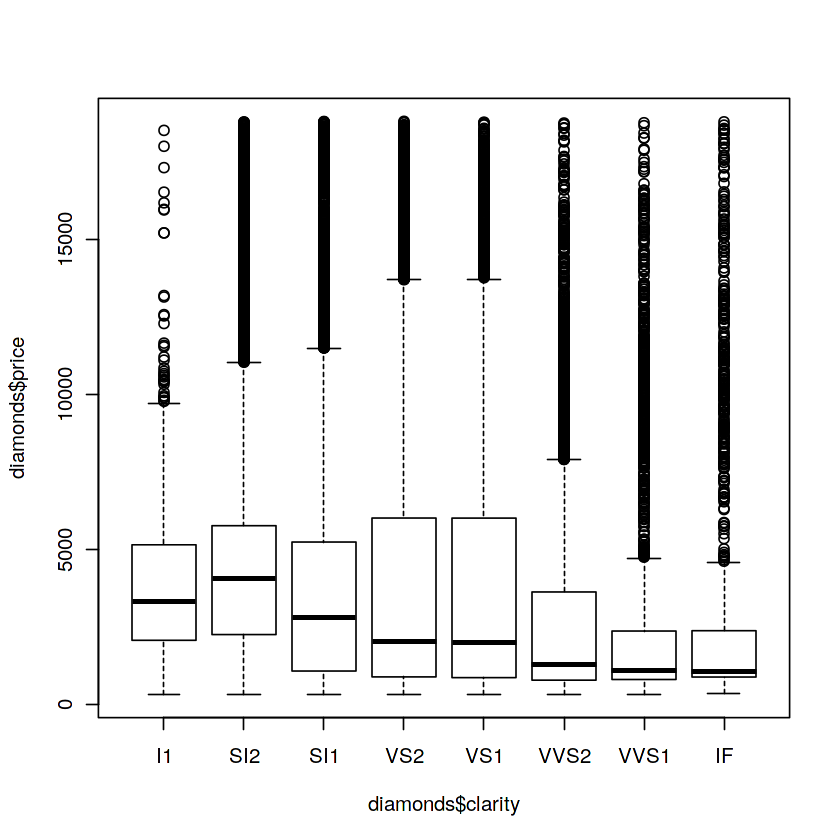

In [6]:
boxplot(diamonds$price ~ diamonds$clarity)  # Plot price split on clarity*

*Note: this is our first example of a formula in R. A formula in R is a representation of the relationship between variables used in certain R functions that tell the function how to use the variables. The response or dependent variable comes first followed by a "~" and then one or more explanatory variables. In this case, the formula basically says "make a boxplot of price based on clarity."*

The boxplot above is curious: we'd expect diamonds with better clarity to fetch higher prices and yet diamonds on the highest end of the clarity spectrum (IF = internally flawless) actually have lower median prices than low clarity diamonds! What gives? Perhaps another boxplot can shed some light on this situation.

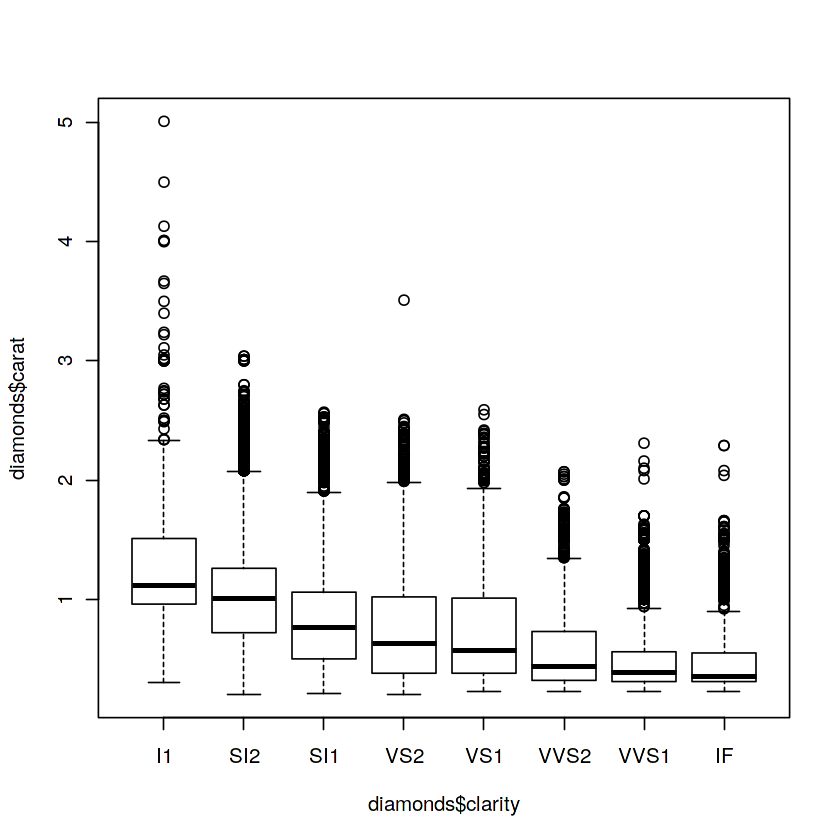

In [7]:
boxplot(diamonds$carat ~ diamonds$clarity)   # Plot of carat split on clarity

The plot above shows that diamonds with low clarity ratings also tend to be larger. Since size is an important factor in determining a diamond's value, it isn't too surprising that low clarity diamonds have higher median prices.

# Density Plots

A density plot shows the distribution of a numeric variable with a continuous curve. It is similar to a histogram but without discrete bins, a density plot gives a better picture of the underlying shape of a distribution. To make a density plot, create a density estimate with the density() function and then pass the result to the plot() function.

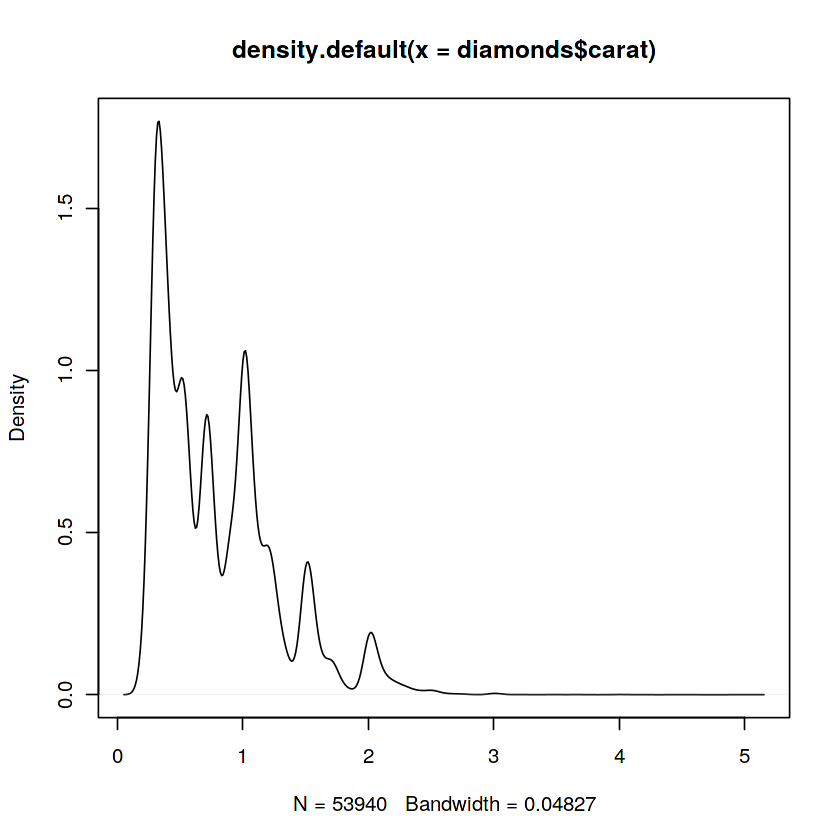

In [8]:
plot(density(diamonds$carat))

# Barplots

Barplots are graphs that visually display counts of categorical variables. Create a barplot by making a table from a categorical variable and passing it to the barplot() function.

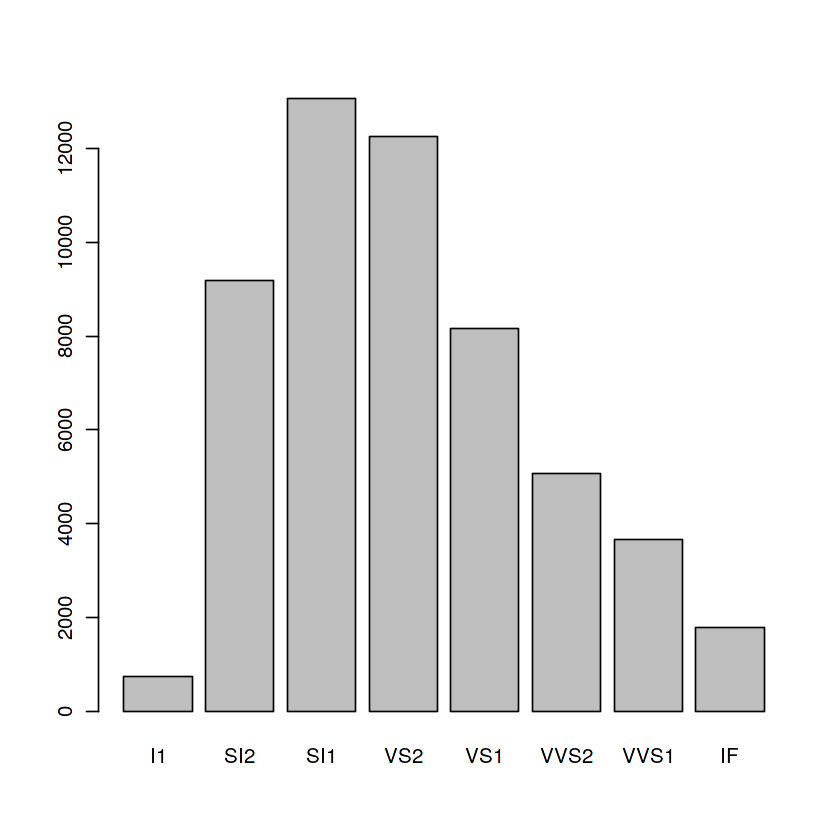

In [9]:
barplot( table(diamonds$clarity) ) 

You can pass a second categorical variable into the table you use to make a barplot to create a stacked barplot. Stacked barplots show the distribution of a second categorical variable within each bar:

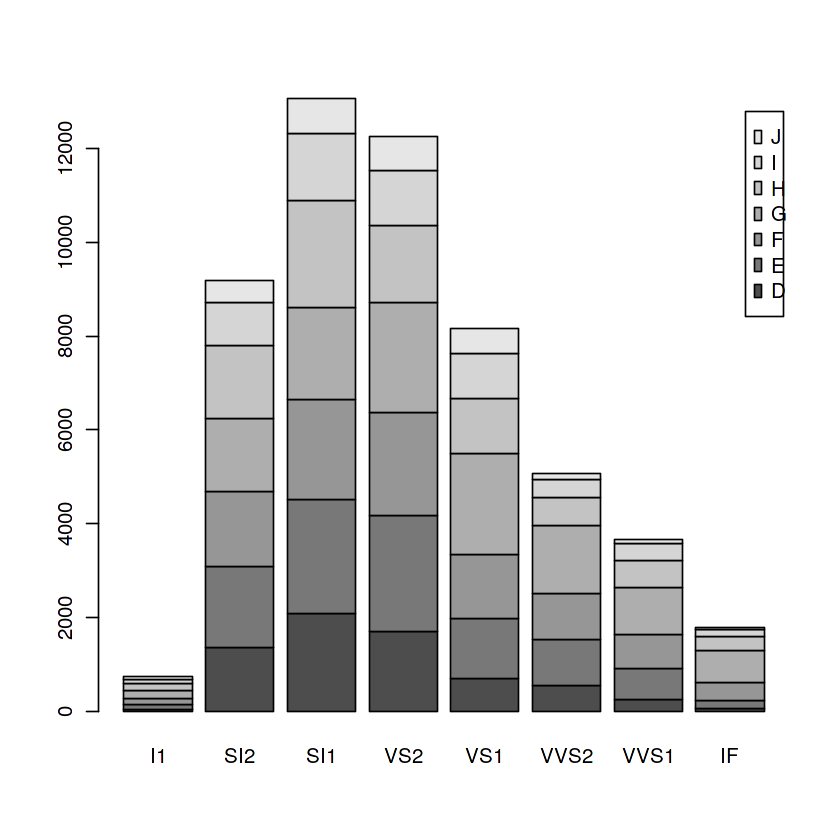

In [10]:
# Create a stacked barplot of clarity, with stacks based on diamond color

barplot( table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color))               # Add a legend for diamond colors

A grouped barplot is an alternative to a stacked barplot that gives each stacked section its own bar. To make a grouped barplot, create a stacked barplot and add the extra argument beside = TRUE.

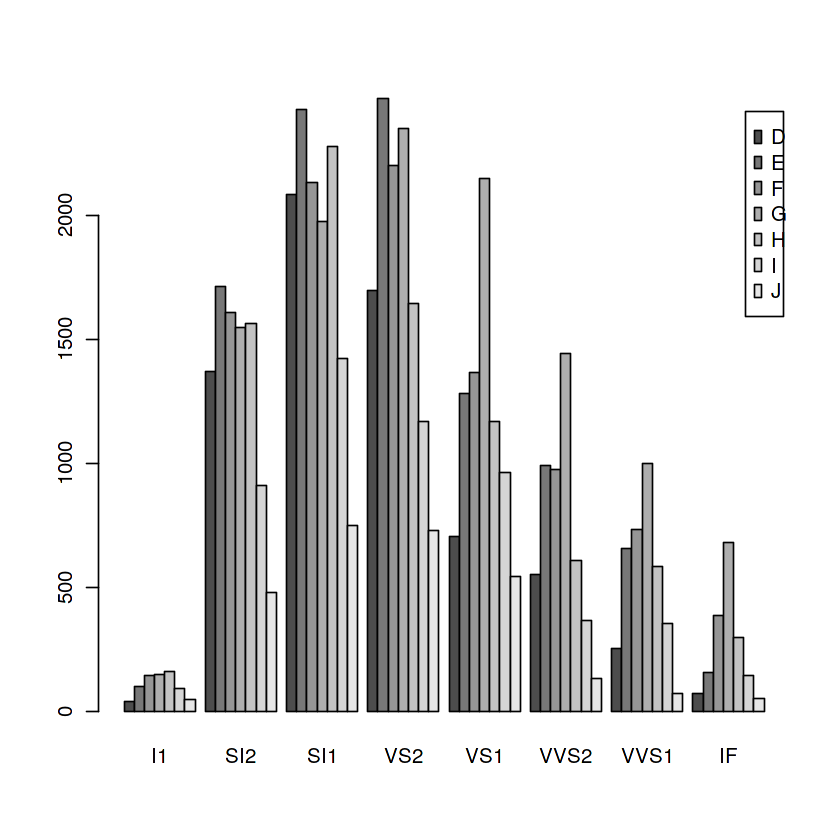

In [11]:
# Create a grouped barplot of clarity and color

barplot( table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color),           
       beside = TRUE)                             # Group instead of stacking

# Scatterplots

Scatterplots are bivariate (two variable) plots that take two numeric variables and plot data points on the x/y plane. We saw an example of scatterplots in lesson 15 when we created a scatter plot matrix of the mtcars data set using the pairs() function. To create a single scatterplot, pass two numeric variables to the plot() function.

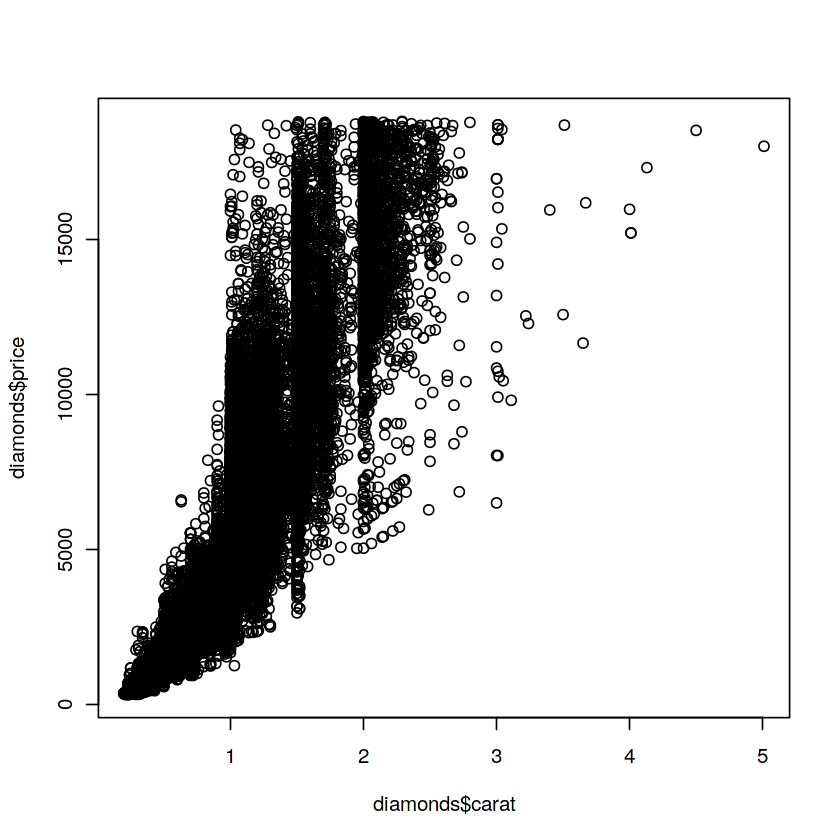

In [12]:
plot(diamonds$carat, 
     diamonds$price)   # Scatter plot of carat and price

Although the scatterplot above has many overlapping points, it still gives us some insight into the relationship between diamond carat weight and price: bigger diamonds are generally more expensive. You may get a better sense of data with overlapping points by adding transparency to your plot. We can remake plot above adding transparency to the points by passing an extra argument to the plot command with the alpha argument set to the desired percentage of opacity.

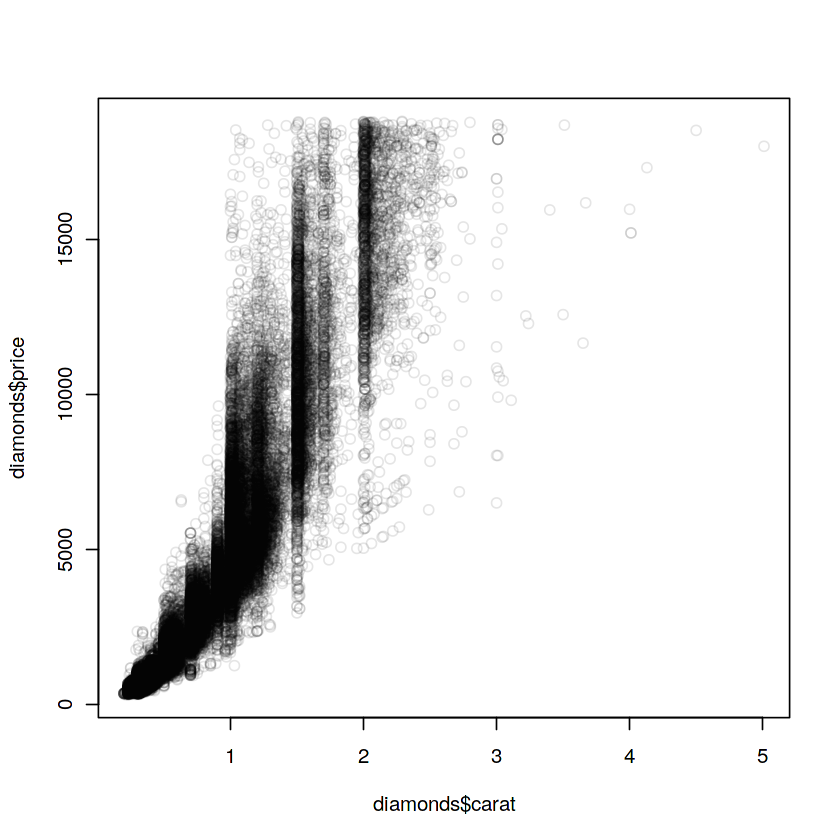

In [13]:
# Recreate the plot above, but use the col option with rgb() to set alpha
plot(diamonds$carat, 
     diamonds$price,
     col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1))

The scatterplot with transparency set does a better job revealing that there appear to be "bands" of diamonds cut to common carat weights such as 1, 1.5 and 2 carats.

# Line Plots

Line plots are charts used to show the change in a numeric variable based on some other ordered variable. Line plots are often used to plot time series data to show the evolution of a variable over time. You can create a a line plot by passing two variables to the plot() function and setting the argument type = "l".

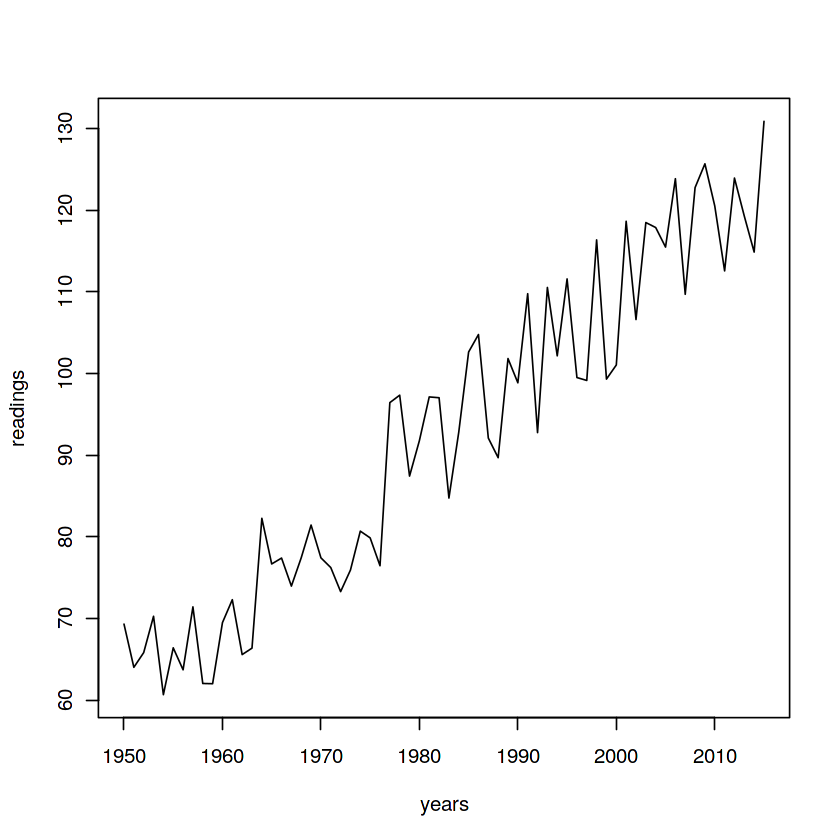

In [14]:
years <- seq(1950,2015,1)                # Create some dummy data
readings <- (years-1900) + runif(66,0,20)

plot(years, readings, type="l")          # Make a line plot of the data

# Plot Parameters

So far we've introduced a variety of different plots but we haven't done a whole lot to make them presentable. R's plotting functions have many extra parameters you can set to do things like adding titles, labeling axes and changing plot's aesthetics. Let's remake one of our previous plots to illustrate some of the parameters you can set.

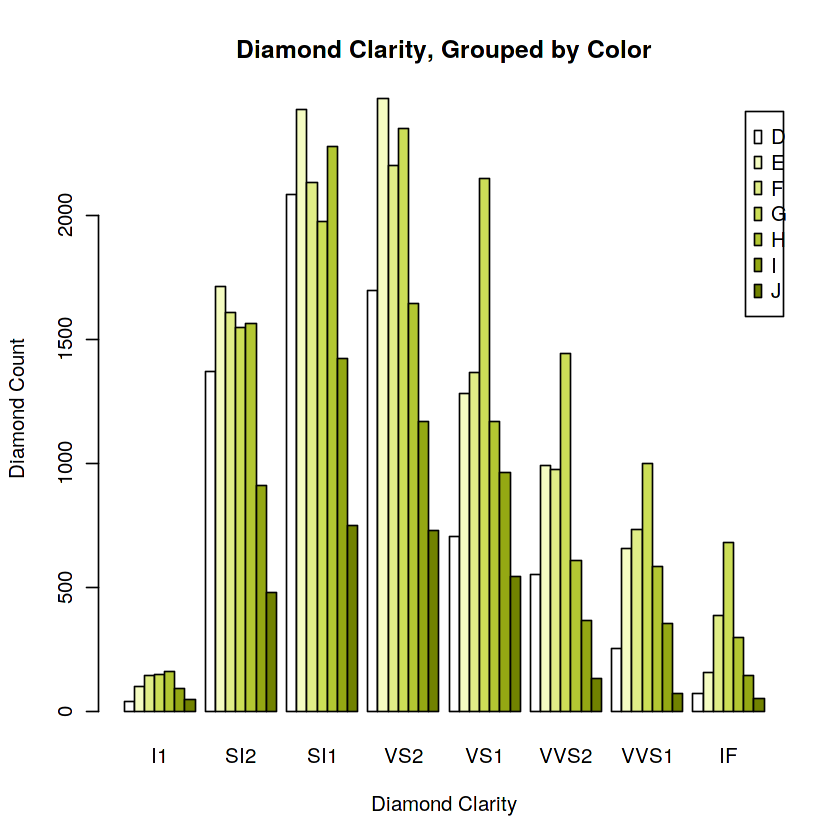

In [15]:
# Remake the grouped barplot
barplot(table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color),           
       beside = TRUE,
       xlab = "Diamond Clarity",                      # Add a label to the X-axis
       ylab = "Diamond Count",                        # Add a label to the Y-axis
       main = "Diamond Clarity, Grouped by Color",    # Add a plot title
       col = c("#FFFFFF","#F5FCC2","#E0ED87","#CCDE57",     # Add color*
              "#B3C732","#94A813","#718200") )

*Note: you can specify colors in a variety of ways, including names like "red", "blue", etc. hex color codes like the ones shown above and with built in color ranges like heat.colors() and terrain.colors()*

Going over all the possible plot parameters is outside the scope of this lesson, but remember you can always use help() to view function documentation.

# Adding Features to Plots

After creating a plot, you can add new features like points, lines, text and a legend. Let's take our series plot and spruce it up.

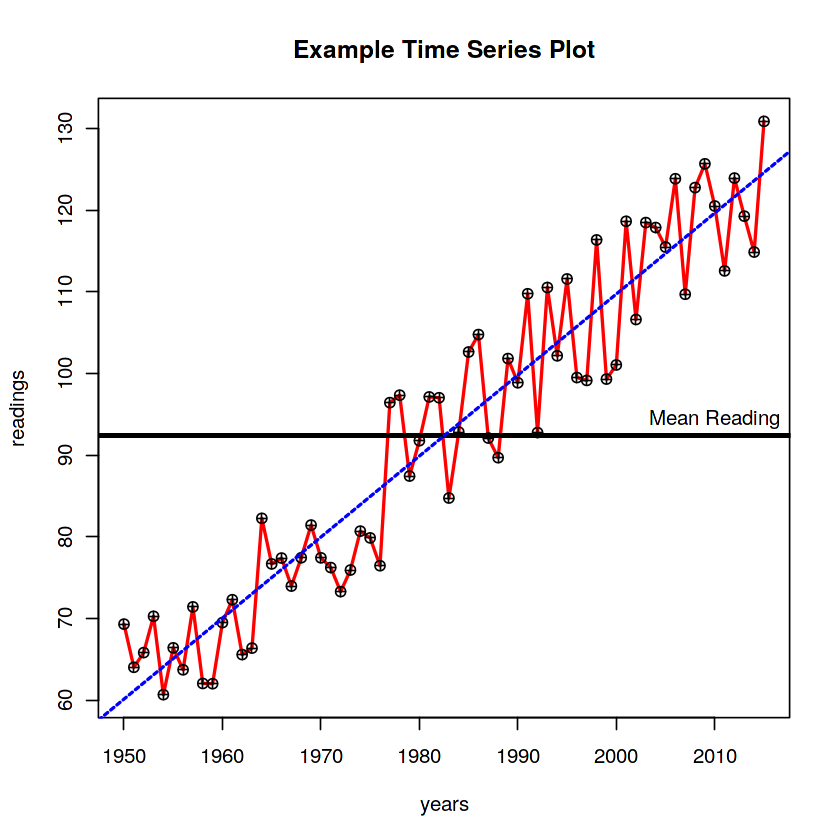

In [16]:
plot(years, readings, type="l", 
                      col="red",                            # Color the line red
                      lwd="2",                              # Increase line width
                      main= "Example Time Series Plot")     # Add plot title   

points(x = years, y = readings,    # Draw points at specified coordinates
        pch=10 )                   # Set point symbol

abline(a = mean(readings),         # Draw a line with Y-intercept a
       b= 0,                       # And slope b
       lwd="3")                    # Set line width

text(x=2010, y=mean(readings)+2,   # Add text at specified coordinates           
     labels="Mean Reading")        # Text to add

abline( lm(readings ~ years),      # Create a line based on a linear model*
       col = "blue",               # Set color
       lty = "dashed",             # Set line type
       lwd = 2)                    # Set line width

*Note: The lm() function creates a linear model based on the supplied formula. In this case we create a model that predicts readings based on years. We'll revisit lm() in a future lesson.*

As you can see, it is possible to make some decent-looking plots with R's base plotting functions if you take the time to set extra parameters and add extra elements.

# Wrap Up

R has a simple yet effective set of base graphical functions that can help you explore data quickly. They aren't always pretty, but they get the job done. If you need to make plots with more features and better aesthetics, you should consider using a dedicated graphics package like ggplot2.

# Next Lesson: [Intro to R Part 20: Plotting with ggplot2](https://www.kaggle.com/hamelg/intro-to-r-part-20-plotting-with-ggplot2)
[back to index](https://www.kaggle.com/hamelg/intro-to-r-index)

## Exercises

To do the exercises, fork this notebook and then fill in and run the code boxes according to the exercise instructions.

### Exercise #1
Load the titanic training data set and create a histogram of the Age variable with 30 bins. (breaks = 30)

In [17]:
titanic_train <- read.csv("../input/train.csv")

"Your code here!"

[1] "Your code here!"

### Exercise #2
Create a boxplot of the Fare variable. Do you notice any outliers?

In [18]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise #3
Create a scatterplot of Age on the x-axis and Fare on the y-axis and limit the y-axis range from 0 to 100. Is there any discernible relationship between Age and Fare paid?

In [19]:
"Your code here!"

[1] "Your code here!"

## Exercise Solutions

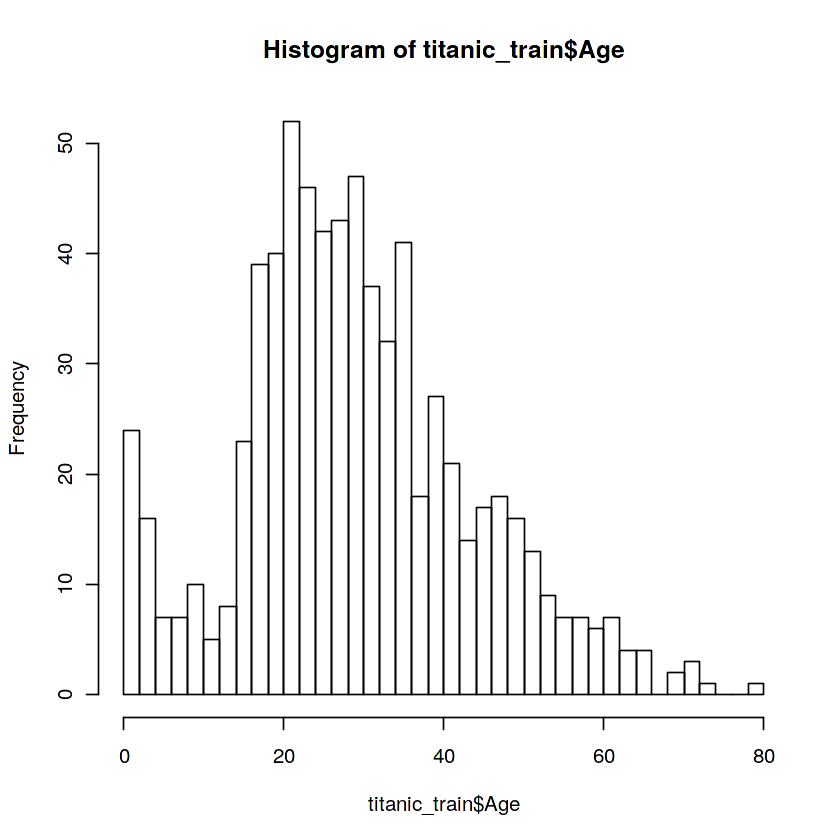

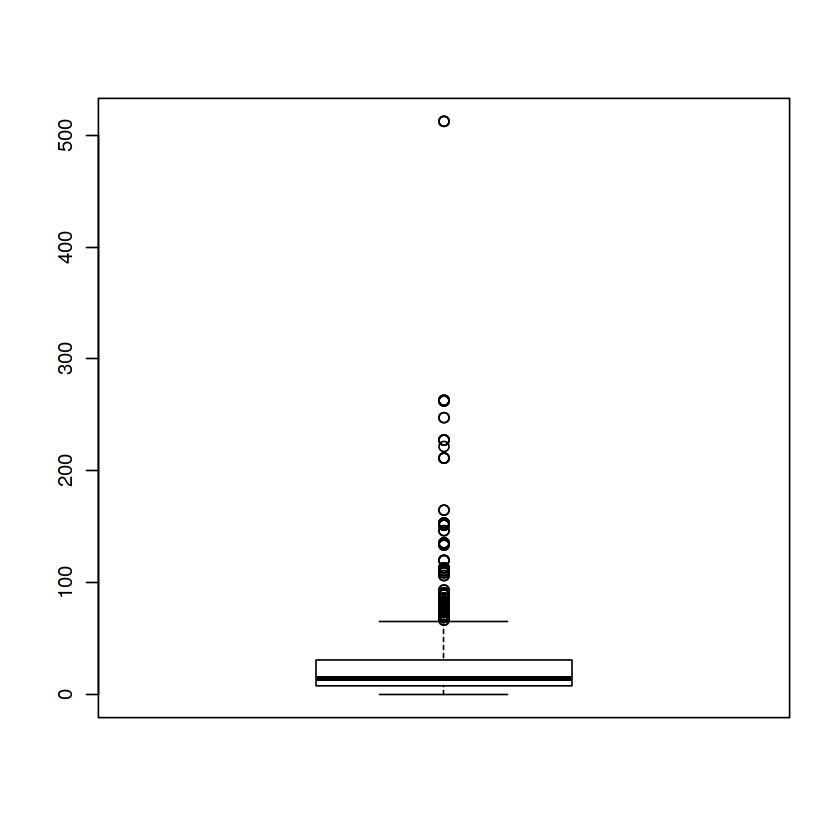

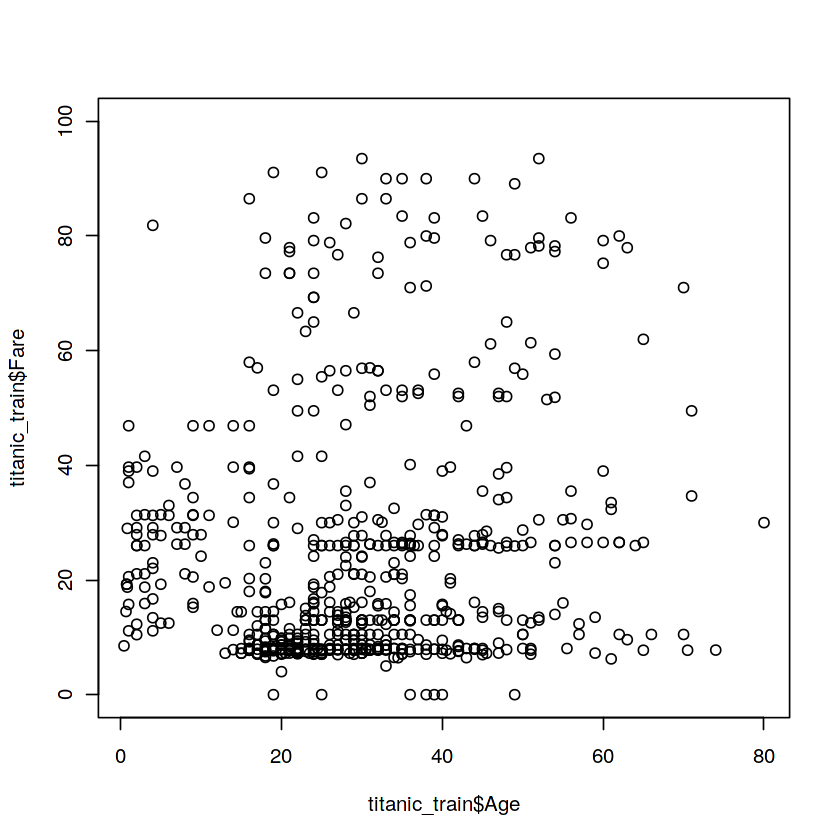

In [20]:
# 1 

titanic_train <- read.csv("../input/train.csv")

hist(titanic_train$Age, breaks=30)

# 2 

boxplot(titanic_train$Fare)

# 3

plot(titanic_train$Age, titanic_train$Fare, ylim = c(0,100))

